**For comparing optimizers, so far we were working with adam optimizer. So now we will try model 8 but with a different optimizer.**

## **Model 10: Medium CNN + LeakyReLU with RMSprop**

**Preprocessing from model 2**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

IMG_SIZE = (128, 128)
BATCH_SIZE = 32
SEED = 42

train_dir = "datasets/Training"
test_dir  = "datasets/Testing"

# Load datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Validation split
val_size = int(0.2 * len(train_ds))
val_ds = train_ds.take(val_size)
train_ds = train_ds.skip(val_size)

# Normalize
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x,y: (normalization_layer(x), y))
val_ds   = val_ds.map(lambda x,y: (normalization_layer(x), y))
test_ds  = test_ds.map(lambda x,y: (normalization_layer(x), y))

# Prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)
test_ds  = test_ds.cache().prefetch(AUTOTUNE)


Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


**With Leaky ReLU**
> Architecture From Model 8
- Conv2D(32) → LeakyReLU → MaxPool
- Conv2D(64) → LeakyReLU → MaxPool
- Conv2D(128) → LeakyReLU → MaxPool
- Flatten → Dense(128, LeakyReLU) → Dense(4, softmax)

In [2]:
def build_medium_cnn_leakyrelu(input_shape=(128,128,3), num_classes=4):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), padding='same', input_shape=input_shape),
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64, (3,3), padding='same'),
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(128, (3,3), padding='same'),
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(128),
        layers.LeakyReLU(alpha=0.1),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model10 = build_medium_cnn_leakyrelu()
model10.summary()

d:\Python11\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\Python11\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,288,196 (16.36 MB)

 Trainable params: 4,288,196 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

**Callbacks**

In [3]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-3, restore_best_weights=True, verbose=1),
    ModelCheckpoint(filepath='models/model10_best.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
]

**Compile with RMSprop**

In [4]:
model10.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

**Train**

In [5]:
history10 = model10.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks
)

Epoch 1/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.5673 - loss: 1.0086
Epoch 1: val_loss improved from None to 0.50386, saving model to models/model10_best.h5


144/144 ━━━━━━━━━━━━━━━━━━━━ 35s 227ms/step - accuracy: 0.6890 - loss: 0.7469 - val_accuracy: 0.8179 - val_loss: 0.5039 - learning_rate: 0.0010
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.8260 - loss: 0.4339
Epoch 2: val_loss did not improve from 0.50386
144/144 ━━━━━━━━━━━━━━━━━━━━ 30s 210ms/step - accuracy: 0.8436 - loss: 0.3944 - val_accuracy: 0.7929 - val_loss: 0.5088 - learning_rate: 0.0010
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.8855 - loss: 0.2991
Epoch 3: val_loss improved from 0.50386 to 0.33097, saving model to models/model10_best.h5


144/144 ━━━━━━━━━━━━━━━━━━━━ 30s 206ms/step - accuracy: 0.9057 - loss: 0.2520 - val_accuracy: 0.8670 - val_loss: 0.3310 - learning_rate: 0.0010
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.9410 - loss: 0.1766
Epoch 4: val_loss improved from 0.33097 to 0.24741, saving model to models/model10_best.h5


144/144 ━━━━━━━━━━━━━━━━━━━━ 31s 217ms/step - accuracy: 0.9508 - loss: 0.1464 - val_accuracy: 0.9170 - val_loss: 0.2474 - learning_rate: 0.0010
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.9526 - loss: 0.1469
Epoch 5: val_loss did not improve from 0.24741
144/144 ━━━━━━━━━━━━━━━━━━━━ 31s 213ms/step - accuracy: 0.9673 - loss: 0.1021 - val_accuracy: 0.9321 - val_loss: 0.2850 - learning_rate: 0.0010
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.9726 - loss: 0.0949
Epoch 6: val_loss did not improve from 0.24741
144/144 ━━━━━━━━━━━━━━━━━━━━ 30s 211ms/step - accuracy: 0.9791 - loss: 0.0721 - val_accuracy: 0.9321 - val_loss: 0.3101 - learning_rate: 0.0010
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.9866 - loss: 0.0527
Epoch 7: val_loss did not improve from 0.24741

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
144/144 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - accuracy: 0.9891 - loss: 0.0412 - val_ac

**Load best model**

In [9]:
best_model10 = tf.keras.models.load_model('models/model10_best.h5')

**Evaluate**

In [10]:
# Evaluate on test set
test_loss, test_acc = best_model10.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Get final training & validation metrics
final_train_acc = history10.history['accuracy'][-1]
final_train_loss = history10.history['loss'][-1]
final_val_acc   = history10.history['val_accuracy'][-1]
final_val_loss  = history10.history['val_loss'][-1]

print(f"Final training accuracy: {final_train_acc:.4f}")
print(f"Final training loss: {final_train_loss:.4f}")
print(f"Final validation accuracy: {final_val_acc:.4f}")
print(f"Final validation loss: {final_val_loss:.4f}")


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9451 - loss: 0.2092
Test accuracy: 0.9451
Test loss: 0.2092
Final training accuracy: 1.0000
Final training loss: 0.0012
Final validation accuracy: 0.9509
Final validation loss: 0.2808


**Loss curve plotting**

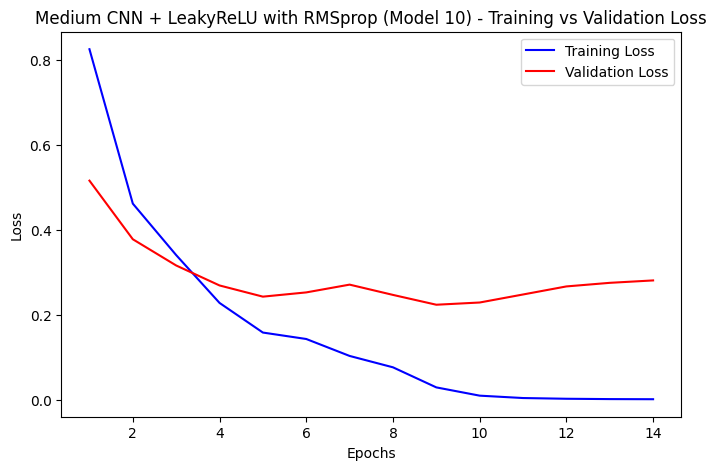

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history, model_name="Model"):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(8, 5))
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title(f'{model_name} - Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Call for Model
plot_loss_curves(history10, model_name="Medium CNN + LeakyReLU with RMSprop (Model 10)")

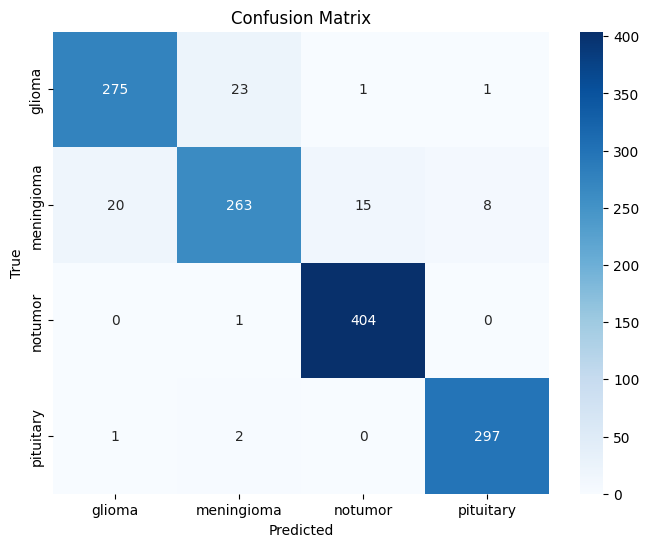


Classification Report:

              precision    recall  f1-score   support

      glioma       0.93      0.92      0.92       300
  meningioma       0.91      0.86      0.88       306
     notumor       0.96      1.00      0.98       405
   pituitary       0.97      0.99      0.98       300

    accuracy                           0.95      1311
   macro avg       0.94      0.94      0.94      1311
weighted avg       0.94      0.95      0.94      1311



In [2]:
from plot_utils import plot_confusion_matrix_from_dataset

class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Confusion matrix from saved model
plot_confusion_matrix_from_dataset("models/model10_best.h5", test_ds, class_names)
